<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

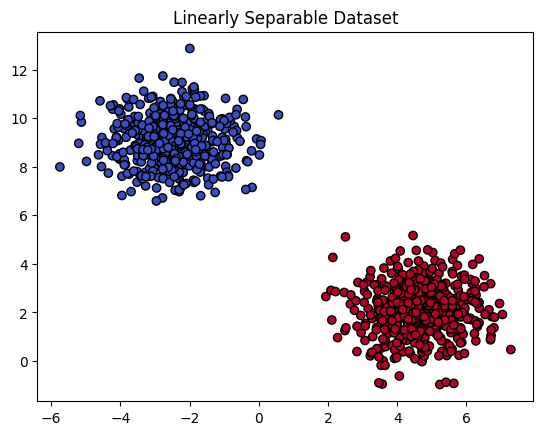

In [ ]:
# Generate a linearly separable dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=1.0)
y = y.reshape(-1, 1)  # Reshape for binary classification

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Linearly Separable Dataset")
plt.show()

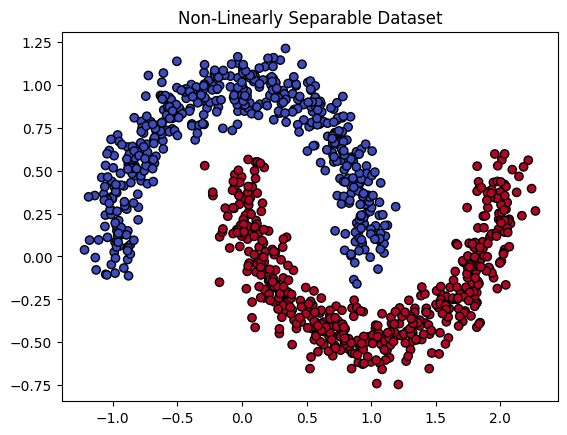

In [ ]:
# Modify the dataset to include non-linearly separable classes
X_non_linear, y_non_linear = make_moons(n_samples=1000, noise=0.1, random_state=42)
y_non_linear = y_non_linear.reshape(-1, 1)  # Reshape for binary classification

# Visualize the dataset
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap='coolwarm', edgecolors='k')
plt.title("Non-Linearly Separable Dataset")
plt.show()

Task 1: Build a single-layer perceptron to classify this dataset. Train the model, and evaluate its performance. Report the accuracy.


Perceptron Accuracy: 100.00%


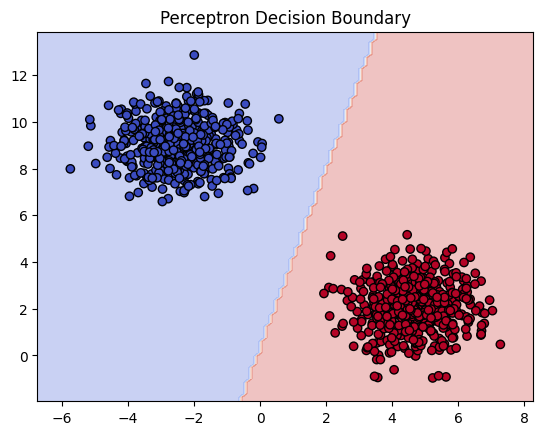

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a linearly separable dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=1.0)
y = y.reshape(-1, 1)  # Reshape for binary classification
y = np.where(y == 0, -1, 1)  # Convert to {-1, 1} for perceptron training

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron Class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)

                # Update rule (only update when misclassified)
                if y_pred != y[idx]:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Train the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Predict on test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

# Visualizing the Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, perceptron)

Task 2: Train the perceptron on this non-linear dataset, observe the results, and report the accuracy.

Perceptron Accuracy on Non-Linear Dataset: 78.50%


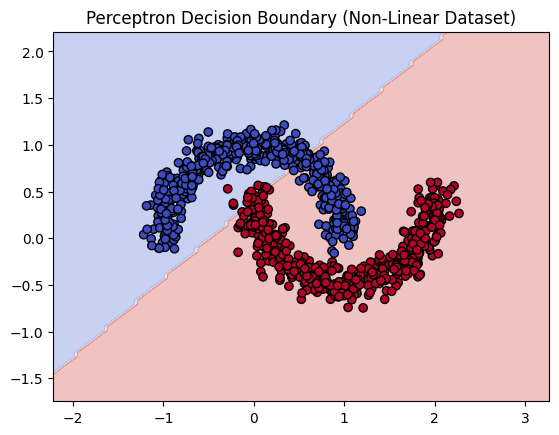

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshape for binary classification
y = np.where(y == 0, -1, 1)  # Convert to {-1, 1} for perceptron training

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron Class (Same as Task 1)
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)

                # Update rule (only update when misclassified)
                if y_pred != y[idx]:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Train the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Predict on test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy on Non-Linear Dataset: {accuracy * 100:.2f}%")

# Visualizing the Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Perceptron Decision Boundary (Non-Linear Dataset)")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, perceptron)


Task 3: Build a simple MLP with one hidden layer to classify the non-linearly separable dataset. Train the model, and evaluate its performance.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5251 - loss: 0.6694 - val_accuracy: 0.6200 - val_loss: 0.6424
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7451 - loss: 0.6270 - val_accuracy: 0.8050 - val_loss: 0.6051
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8087 - loss: 0.5926 - val_accuracy: 0.7950 - val_loss: 0.5722
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8068 - loss: 0.5579 - val_accuracy: 0.8100 - val_loss: 0.5423
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.5285 - val_accuracy: 0.8100 - val_loss: 0.5146
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 0.4877 - val_accuracy: 0.8250 - val_loss: 0.4890
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.4716 - val_accuracy: 0.8300 - val_loss: 0.4655
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8529 - loss: 0.4374 - val_accuracy: 0.8300 - val_loss

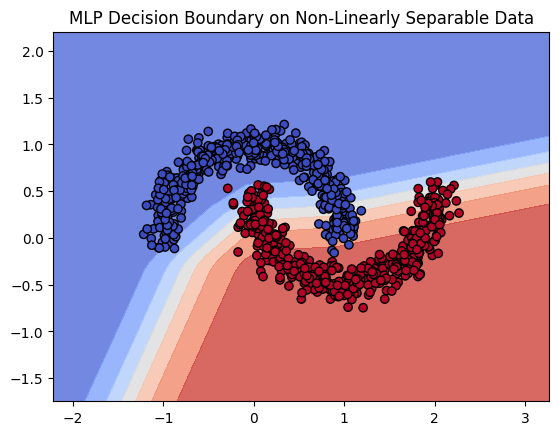

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Generate the non-linearly separable dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
y = y.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple MLP model with one hidden layer
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, y_pred))

# Visualize the decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='coolwarm')
plt.title('MLP Decision Boundary on Non-Linearly Separable Data')
plt.show()


Task 4: Experiment with different activation functions (sigmoid, and ReLU) and report any changes in performance.


Training with activation function: relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy with relu: 0.8950
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       100
           1       0.87      0.93      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

6807/6807 ━━━━━━━━━━━━━━━━━━━━ 7s 998us/step


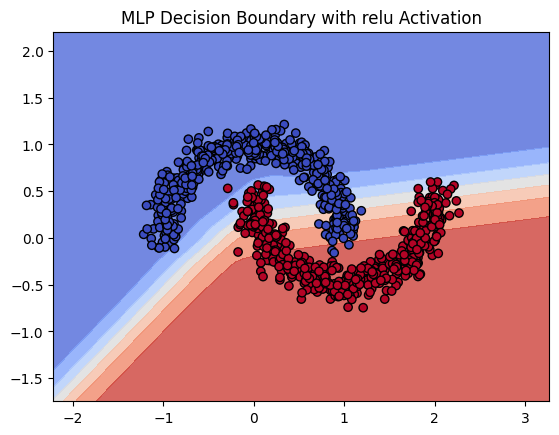


Training with activation function: sigmoid


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy with sigmoid: 0.8350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       100
           1       0.83      0.85      0.84       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

6807/6807 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


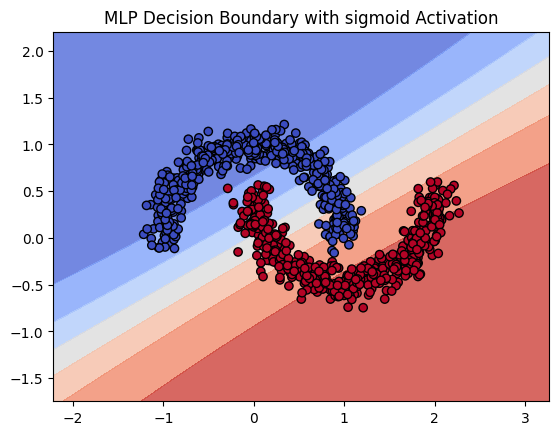


Summary of Test Accuracies:
relu: 0.8950
sigmoid: 0.8350


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

# Generate the non-linearly separable dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
y = y.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different activation functions
activations = ['relu', 'sigmoid']
results = {}

for activation in activations:
    print(f'\nTraining with activation function: {activation}')
    # Build a simple MLP model with one hidden layer
    model = keras.Sequential([
        layers.Dense(16, activation=activation, input_shape=(2,)),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation] = accuracy
    print(f'Test Accuracy with {activation}: {accuracy:.4f}')

    # Generate classification report and confusion matrix
    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    print(classification_report(y_test, y_pred))

    # Visualize the decision boundary
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='coolwarm')
    plt.title(f'MLP Decision Boundary with {activation} Activation')
    plt.show()

print('\nSummary of Test Accuracies:')
for activation, accuracy in results.items():
    print(f'{activation}: {accuracy:.4f}')
